In [55]:
import pandas as pd
#Load dataset
df= pd.read_csv("utm_campaign_data.csv")
#view first few rows
print("data:")
df.head()

data:


,Date,Source,Medium,Campaign,Device,Location,Clicks,Conversions,Revenue,UTM_URL
0,2024-06-12,Google,CPC,Product_Launch,Desktop,UK,81,13,1801.45,https://example.com?utm_source=google&utm_medi...
1,2024-05-19,Google,Social,Webinar_Promo,Desktop,USA,57,13,704.67,https://example.com?utm_source=google&utm_medi...
2,2024-06-03,Google,Social,Black_Friday,Tablet,Germany,224,56,5339.58,https://example.com?utm_source=google&utm_medi...
3,2024-03-12,Google,Organic,Webinar_Promo,Mobile,Ghana,89,27,5180.50,https://example.com?utm_source=google&utm_medi...
4,2024-03-27,Google,CPC,Webinar_Promo,Desktop,Ghana,443,176,21948.60,https://example.com?utm_source=google&utm_medi...


In [56]:
#convert Date
df["Date"] = pd.to_datetime(df["Date"])


In [57]:
# Clean Dataset
def check_data_quality(df):
    print(" DATA QUALITY REPORT")
    print("="*40)
    
    # 1. Missing values
    print("\n1 Missing values per column:")
    print(df.isna().sum())
    
    # 2. Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n2 Duplicate rows: {duplicates}")
    
    # 3. Data types
    print("\n3 Data types:")
    print(df.dtypes)
    
    # 4. Logical checks
    invalid_conversions = (df["Conversions"] > df["Clicks"]).sum()
    negative_revenue = (df["Revenue"] < 0).sum()
    print("\n4 Logical inconsistencies:")
    print(f"- Conversions > Clicks: {invalid_conversions}")
    print(f"- Negative revenue: {negative_revenue}")
    
    # 5. Descriptive stats for numeric columns
    print("\n5 Descriptive statistics:")
    print(df.describe())
check_data_quality(df)
print(df.head())
print(df.shape)


 DATA QUALITY REPORT

1 Missing values per column:
Date           0
Source         0
Medium         0
Campaign       0
Device         0
Location       0
Clicks         0
Conversions    0
Revenue        0
UTM_URL        0
dtype: int64

2 Duplicate rows: 0

3 Data types:
Date           datetime64[ns]
Source                 object
Medium                 object
Campaign               object
Device                 object
Location               object
Clicks                  int64
Conversions             int64
Revenue               float64
UTM_URL                object
dtype: object

4 Logical inconsistencies:
- Conversions > Clicks: 0
- Negative revenue: 0

5 Descriptive statistics:
                      Date      Clicks  Conversions       Revenue
count                  300  300.000000   300.000000    300.000000
mean   2024-04-03 20:09:36  253.923333   127.550000  13275.834433
min    2024-01-01 00:00:00   10.000000     0.000000      0.000000
25%    2024-02-12 00:00:00  128.750000    39.7500

In [58]:
#create new calculated columns
df["Conversion_Rate"] = df["Conversions"] / df["Clicks"]
df["Revenue_per_Click"] = df['Revenue'] /df["Clicks"]
# Preview a few rows to confirm
df[["Source", "Campaign", "Clicks", "Conversions", "Revenue", "Conversion_Rate"]].head()



,Source,Campaign,Clicks,Conversions,Revenue,Conversion_Rate
0,Google,Product_Launch,81,13,1801.45,0.160494
1,Google,Webinar_Promo,57,13,704.67,0.228070
2,Google,Black_Friday,224,56,5339.58,0.250000
3,Google,Webinar_Promo,89,27,5180.50,0.303371
4,Google,Webinar_Promo,443,176,21948.60,0.397291


Campaign Perfomance Analysis

In [59]:
# Step 1: Campaign KPIs (numeric for analysis)
campaign_kpis = df.groupby("Campaign").agg({
    "Clicks": "sum",
    "Conversions": "sum",
    "Revenue": "sum"
}).reset_index()

# Add calculated metrics
campaign_kpis["Conversion_Rate"] = campaign_kpis["Conversions"] / campaign_kpis["Clicks"]
campaign_kpis["Revenue_per_Click"] = campaign_kpis["Revenue"] / campaign_kpis["Clicks"]
campaign_kpis["Revenue_per_Conversion"] = campaign_kpis["Revenue"] / campaign_kpis["Conversions"]

# Step 2: Reporting (pretty version)
campaign_kpis_display = campaign_kpis.copy()
campaign_kpis_display["Revenue"] = campaign_kpis_display["Revenue"].apply(lambda x: f"${x:,.2f}")
campaign_kpis_display["Revenue_per_Click"] = campaign_kpis_display["Revenue_per_Click"].apply(lambda x: f"${x:,.2f}")
campaign_kpis_display["Revenue_per_Conversion"] = campaign_kpis_display["Revenue_per_Conversion"].apply(lambda x: f"${x:,.2f}")
campaign_kpis_display["Conversion_Rate"] = campaign_kpis_display["Conversion_Rate"].apply(lambda x: f"{x:.2%}")

# Step 3: Sort & show top 5
top5_by_revenue = campaign_kpis.sort_values("Revenue", ascending=False).head(5)
top5_by_conversion = campaign_kpis.sort_values("Conversion_Rate", ascending=False).head(5)

# Display  formatted
top5_by_revenue_display = campaign_kpis_display.loc[top5_by_revenue.index]
top5_by_conversion_display = campaign_kpis_display.loc[top5_by_conversion.index]

print(" Top 5 Campaigns by Revenue")
display(top5_by_revenue_display)

print("\n Top 5 Campaigns by Conversion Rate")
display(top5_by_conversion_display)



 Top 5 Campaigns by Revenue


,Campaign,Clicks,Conversions,Revenue,Conversion_Rate,Revenue_per_Click,Revenue_per_Conversion
4,Webinar_Promo,20120,9992,"$1,099,511.21",49.66%,$54.65,$110.04
0,Black_Friday,16010,8793,"$814,957.66",54.92%,$50.90,$92.68
1,Brand_Awareness,13818,7369,"$752,799.49",53.33%,$54.48,$102.16
3,Spring_Sale,13735,6013,"$689,094.42",43.78%,$50.17,$114.60
2,Product_Launch,12494,6098,"$626,387.55",48.81%,$50.14,$102.72



 Top 5 Campaigns by Conversion Rate


,Campaign,Clicks,Conversions,Revenue,Conversion_Rate,Revenue_per_Click,Revenue_per_Conversion
0,Black_Friday,16010,8793,"$814,957.66",54.92%,$50.90,$92.68
1,Brand_Awareness,13818,7369,"$752,799.49",53.33%,$54.48,$102.16
4,Webinar_Promo,20120,9992,"$1,099,511.21",49.66%,$54.65,$110.04
2,Product_Launch,12494,6098,"$626,387.55",48.81%,$50.14,$102.72
3,Spring_Sale,13735,6013,"$689,094.42",43.78%,$50.17,$114.60


In [60]:
import pandas as pd

def segment_analysis(df, segment_col):
    """Summarize KPIs by a given segment column"""
    segment_summary = (
        df.groupby(segment_col)
        .agg({
            "Clicks": "sum",
            "Conversions": "sum",
            "Revenue": "sum"
        })
        .reset_index()
    )
    
    # Derived metrics
    segment_summary["Conversion Rate"] = (segment_summary["Conversions"] / segment_summary["Clicks"]).round(3)
    segment_summary["Revenue per Click"] = (segment_summary["Revenue"] / segment_summary["Clicks"]).round(2)
    segment_summary["Revenue per Conversion"] = (segment_summary["Revenue"] / segment_summary["Conversions"]).replace([float("inf"), -float("inf")], 0).round(2)
    
    return segment_summary.sort_values("Revenue", ascending=False)

# 1. Source/Medium performance
print("\n--- Performance by Source ---")
print(segment_analysis(df, "Source"))

print("\n--- Performance by Medium ---")
print(segment_analysis(df, "Medium"))

# 2. Device performance
print("\n--- Performance by Device ---")
print(segment_analysis(df, "Device"))

# 3. Location performance
print("\n--- Performance by Location ---")
print(segment_analysis(df, "Location").head(10))  # top 10 locations



--- Performance by Source ---
     Source  Clicks  Conversions    Revenue  Conversion Rate  \
0     Email   16474         8137  921142.24            0.494   
4   Twitter   18286         9222  825708.26            0.504   
3  LinkedIn   15848         7833  821984.26            0.494   
2    Google   14220         6568  740361.26            0.462   
1  Facebook   11349         6505  673554.31            0.573   

   Revenue per Click  Revenue per Conversion  
0              55.91                  113.20  
4              45.16                   89.54  
3              51.87                  104.94  
2              52.06                  112.72  
1              59.35                  103.54  

--- Performance by Medium ---
     Medium  Clicks  Conversions    Revenue  Conversion Rate  \
2   Organic   19103         9554  958625.86            0.500   
3  Referral   13427         7549  887878.54            0.562   
0       CPC   17426         8672  858222.14            0.498   
4    Social   1

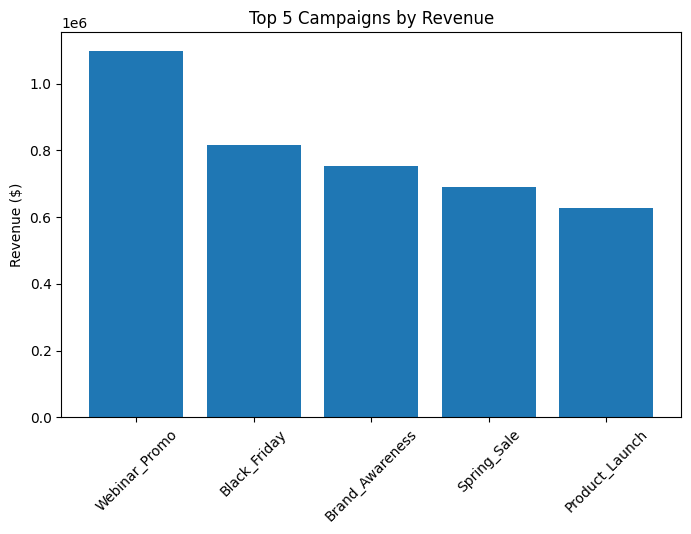

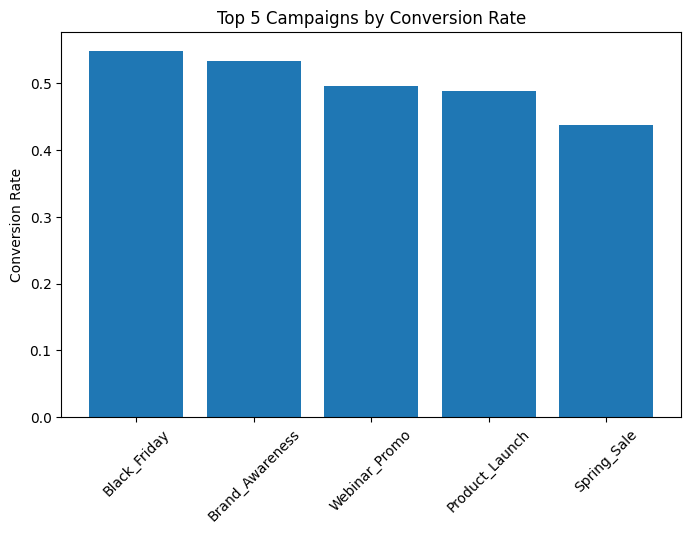

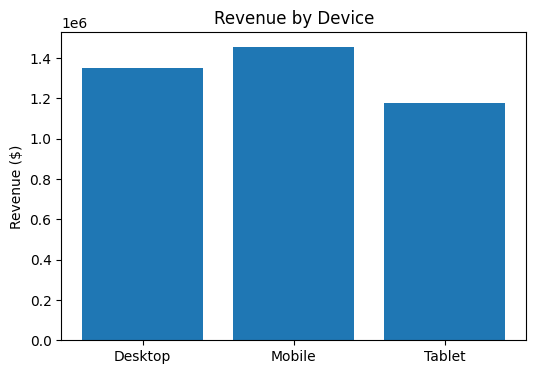

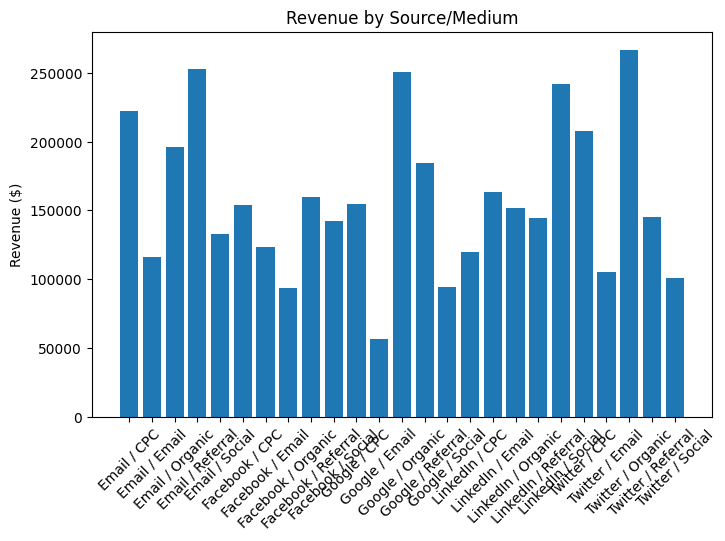

In [61]:
import matplotlib.pyplot as plt

# --- 1. Top 5 Campaigns by Revenue ---
campaign_summary = (
    df.groupby("Campaign")
    .agg({"Clicks": "sum", "Conversions": "sum", "Revenue": "sum"})
    .reset_index()
)
campaign_summary["Conversion Rate"] = campaign_summary["Conversions"] / campaign_summary["Clicks"]

top5_revenue = campaign_summary.sort_values("Revenue", ascending=False).head(5)
top5_conversion = campaign_summary.sort_values("Conversion Rate", ascending=False).head(5)

# Plot Top 5 by Revenue
plt.figure(figsize=(8,5))
plt.bar(top5_revenue["Campaign"], top5_revenue["Revenue"])
plt.title("Top 5 Campaigns by Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

# --- 2. Top 5 Campaigns by Conversion Rate ---
plt.figure(figsize=(8,5))
plt.bar(top5_conversion["Campaign"], top5_conversion["Conversion Rate"])
plt.title("Top 5 Campaigns by Conversion Rate")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

# --- 3. Performance by Device ---
device_summary = df.groupby("Device").agg({"Revenue":"sum"}).reset_index()
plt.figure(figsize=(6,4))
plt.bar(device_summary["Device"], device_summary["Revenue"])
plt.title("Revenue by Device")
plt.ylabel("Revenue ($)")
plt.show()

# --- 4. Performance by Source/Medium ---
source_medium_summary = (
    df.groupby(["Source","Medium"])
    .agg({"Revenue":"sum"})
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.bar(source_medium_summary["Source"] + " / " + source_medium_summary["Medium"], 
        source_medium_summary["Revenue"])
plt.title("Revenue by Source/Medium")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()


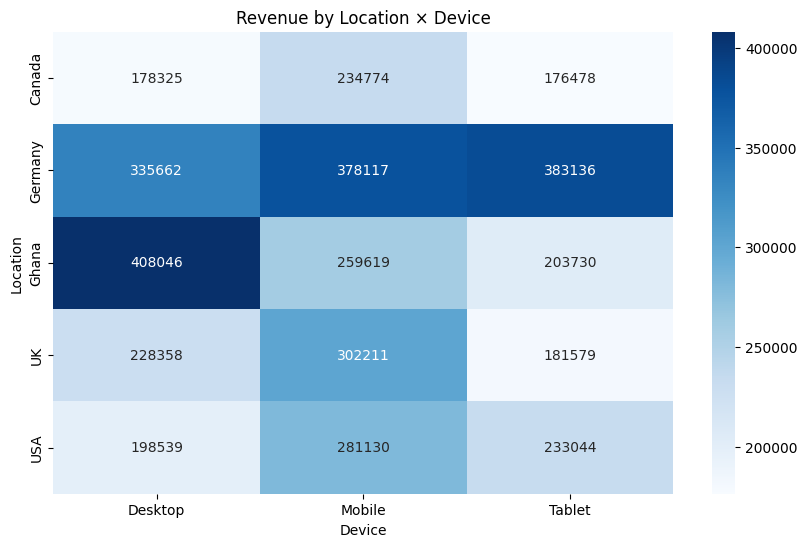

In [62]:
import seaborn as sns

# Create pivot table for heatmap
heatmap_data = df.pivot_table(
    values="Revenue",
    index="Location",
    columns="Device",
    aggfunc="sum",
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues")
plt.title("Revenue by Location × Device")
plt.ylabel("Location")
plt.xlabel("Device")
plt.show()
